#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 11
### Due: Monday, Apr 18th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 18th.

---

## Problem 1


This problem has to do with density estimation and clustering. 

1. Read in `hw11_data.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


### Solution

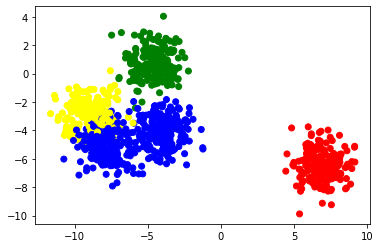

In [75]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

data = np.load('hw11_data.npy')

columns = list(zip(*data))

colors = ['red','yellow','green','blue']

fig, ax = plt.subplots()
ax.scatter(columns[0], columns[1], c = columns[2], 
           cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

new_data = np.concatenate([columns[0], columns[1]])

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=5) # 5-fold cross-validation

grid.fit(new_data[:, None])
bandwidth = grid.best_params_
print(bandwidth)

{'bandwidth': 0.4413793103448276}


(array([  5.,  17.,  45.,  72.,  79., 128., 115., 106., 142., 176., 219.,
        227., 148.,  81.,  30.,  28.,  40.,  54.,  44.,  23.,  19.,   1.,
          1.,   6.,  14.,  38.,  56.,  47.,  25.,  14.]),
 array([-11.64348431, -10.94983771, -10.25619111,  -9.56254451,
         -8.86889791,  -8.17525132,  -7.48160472,  -6.78795812,
         -6.09431152,  -5.40066492,  -4.70701832,  -4.01337172,
         -3.31972513,  -2.62607853,  -1.93243193,  -1.23878533,
         -0.54513873,   0.14850787,   0.84215447,   1.53580106,
          2.22944766,   2.92309426,   3.61674086,   4.31038746,
          5.00403406,   5.69768066,   6.39132725,   7.08497385,
          7.77862045,   8.47226705,   9.16591365]),
 [<matplotlib.patches.Polygon at 0x7ffbc952f7c0>])

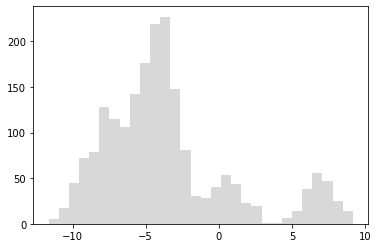

In [77]:
x_grid = np.linspace(-15, 10, 1000)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.hist(new_data, 30, fc='gray', histtype='stepfilled', alpha=0.3)

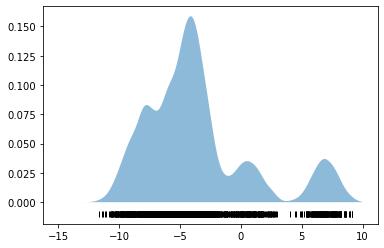

In [81]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=0.4413793103448276) # Calculated
kde.fit(new_data[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_grid[:, None])

plt.fill_between(x_grid, np.exp(logprob), alpha=0.5)
plt.plot(new_data, np.full_like(new_data, -0.01), '|k', markeredgewidth=1)